In [ ]:
!pip install yfinance


from keras.layers import concatenate
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import yfinance as yf


startDate = '2012-01-01'
endDate = '2022-01-01'

In [ ]:
weather = pd.read_csv('wather2012-2021_final_csv.csv')
weather['Date'] =  pd.to_datetime(weather['Date'])
weather.set_index('Date',drop=True,inplace=True)
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2012-01-01 to 2021-12-31
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   khasab_HighTemp           3653 non-null   int64  
 1   khasab_LowTemp            3653 non-null   int64  
 2   khasab_DayAverageTemp     3653 non-null   float64
 3   khasab_Precipitation      3653 non-null   float64
 4   khasab_MaxWindSpeed       3653 non-null   int64  
 5   miami_HighTemp            3653 non-null   int64  
 6   miami_LowTemp             3653 non-null   int64  
 7   miami_DayAverageTemp      3653 non-null   float64
 8   miami_Precipitation       3653 non-null   float64
 9   miami_MaxWindSpeed        3653 non-null   int64  
 10  newOrlean_HighTemp        3653 non-null   int64  
 11  newOrlean_LowTemp         3653 non-null   int64  
 12  newOrlean_DayAverageTemp  3653 non-null   float64
 13  newOrlean_Precipitation   3653 non-null   flo

In [ ]:
import requests
from datetime import date
import matplotlib.ticker as ticker

# API Key from EIA
api_key = 'hQWdhPKc9fc1SMvHGXD3LtYNILNH8j855shdnI3f'
PADD_NAMES = ['TOTAL SUPPLIED']
PADD_KEY = ['PET.WRPUPUS2.W']
final_data = []

for i in range(len(PADD_KEY)):
    url = 'https://api.eia.gov/series/?api_key=' + api_key + '&series_id=' + PADD_KEY[i]
    r = requests.get(url)
    json_data = r.json()
    print(r)
    if r.status_code == 200:
        print('Success!')
    else:
        print('Error')
    
    df = pd.DataFrame(json_data.get('series')[0].get('data'), columns = ['Date', PADD_NAMES[i]])
    df.set_index('Date', drop=True, inplace=True)
    final_data.append(df)

totcrude = pd.concat(final_data, axis=1)
totcrude['Year'] = totcrude.index.astype(str).str[:4]
totcrude['Month'] = totcrude.index.astype(str).str[4:6]
totcrude['Day'] = totcrude.index.astype(str).str[6:]

totcrude['Date'] = pd.to_datetime(totcrude[['Year','Month','Day']])
totcrude.set_index('Date',drop=True,inplace=True)
totcrude.sort_index(inplace=True)
totcrude = totcrude[startDate:endDate]
totcrude = totcrude.iloc[:,:1]

<Response [200]>
Success!


In [ ]:
# CRUDE OIL - CL=F
# SHEL - SHELL
# BP - BP p.l.c.
# SLB - Schlumberger Limited
# REP.MC - Repsol, S.A.
oil_data = yf.download("CL=F SHEL BP SLB REP.MC", start= startDate, end= endDate)


[*********************100%***********************]  5 of 5 completed


In [ ]:
oil_close_date=oil_data['Close']

In [ ]:
#oil_close_date1 = pd.merge(oil_close_date, totcrude, how='left', left_on='Date', right_on='Date')
#oil_close_date1=oil_close_date1.fillna(method='ffill')
#oil_close_date1=oil_close_date1.fillna(method='bfill')
#oil_close_date = oil_close_date1

oil_close_date = pd.merge(oil_close_date, weather, left_on='Date', right_on='Date')

oil_close_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2583 entries, 2012-01-02 to 2021-12-31
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BP                        2517 non-null   float64
 1   CL=F                      2516 non-null   float64
 2   REP.MC                    2557 non-null   float64
 3   SHEL                      2517 non-null   float64
 4   SLB                       2517 non-null   float64
 5   khasab_HighTemp           2583 non-null   int64  
 6   khasab_LowTemp            2583 non-null   int64  
 7   khasab_DayAverageTemp     2583 non-null   float64
 8   khasab_Precipitation      2583 non-null   float64
 9   khasab_MaxWindSpeed       2583 non-null   int64  
 10  miami_HighTemp            2583 non-null   int64  
 11  miami_LowTemp             2583 non-null   int64  
 12  miami_DayAverageTemp      2583 non-null   float64
 13  miami_Precipitation       2583 non-null   flo

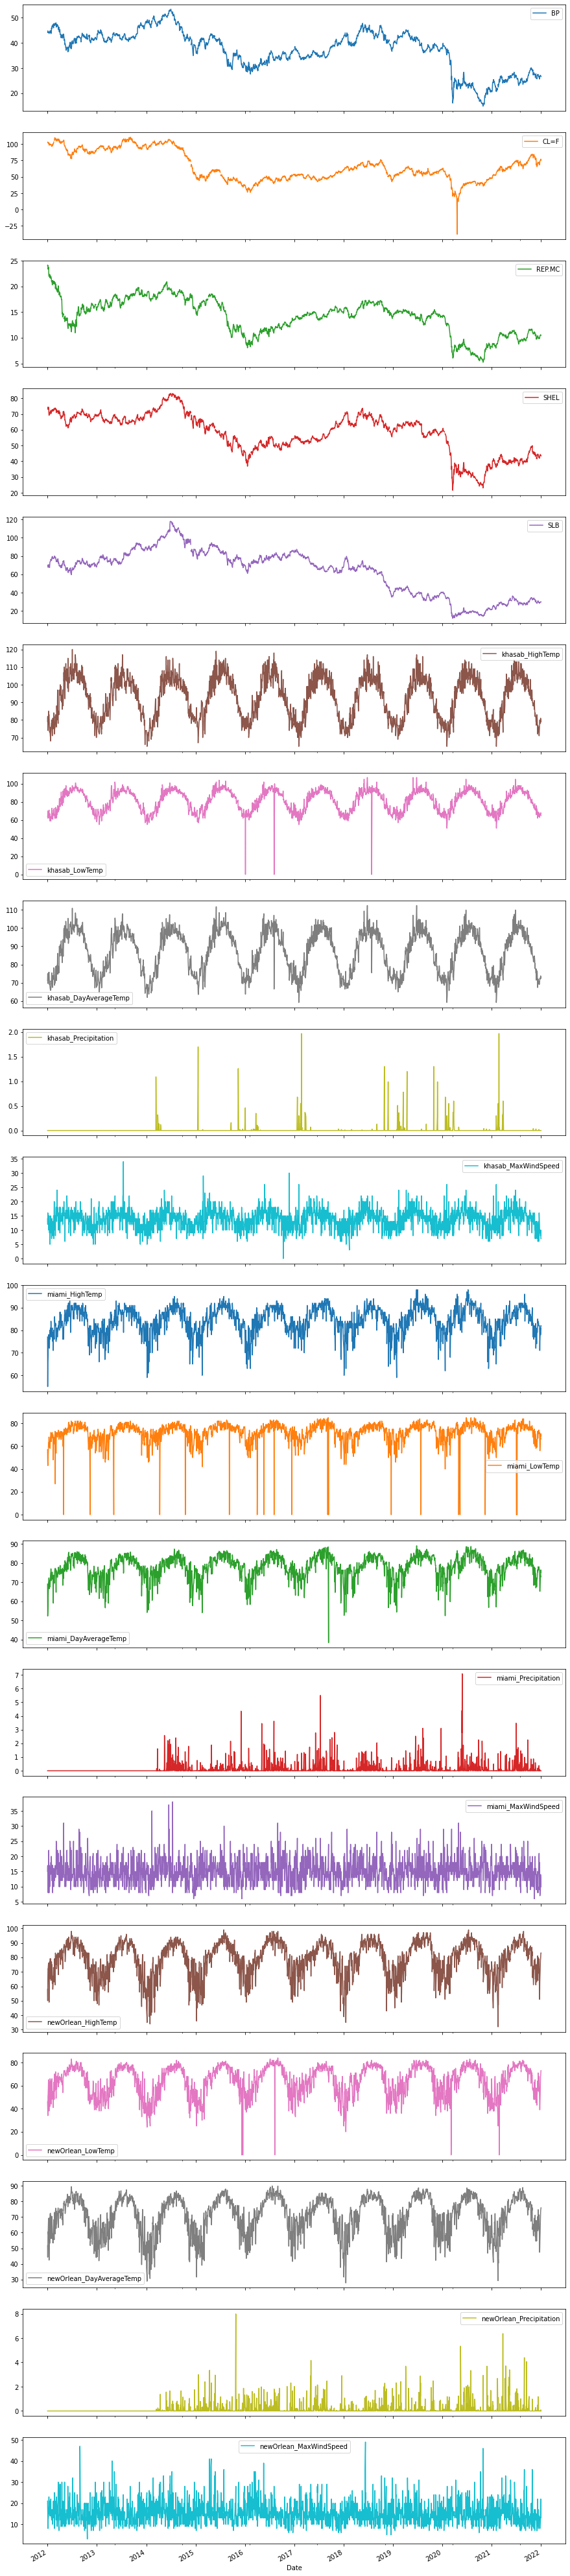

In [ ]:
oil_close_date.plot(subplots=True, figsize=(15,80))

plt.show()

In [ ]:
oil_close_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2583 entries, 2012-01-02 to 2021-12-31
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BP                        2517 non-null   float64
 1   CL=F                      2516 non-null   float64
 2   REP.MC                    2557 non-null   float64
 3   SHEL                      2517 non-null   float64
 4   SLB                       2517 non-null   float64
 5   khasab_HighTemp           2583 non-null   int64  
 6   khasab_LowTemp            2583 non-null   int64  
 7   khasab_DayAverageTemp     2583 non-null   float64
 8   khasab_Precipitation      2583 non-null   float64
 9   khasab_MaxWindSpeed       2583 non-null   int64  
 10  miami_HighTemp            2583 non-null   int64  
 11  miami_LowTemp             2583 non-null   int64  
 12  miami_DayAverageTemp      2583 non-null   float64
 13  miami_Precipitation       2583 non-null   flo

In [ ]:
oil_close_date.drop(oil_close_date.columns[range(6, 7)], axis=1, inplace=True)
oil_close_date['pred'] = oil_close_date['CL=F']
oil_close_date = oil_close_date.dropna()
print(oil_close_date.head())

                   BP        CL=F     REP.MC       SHEL        SLB  \
Date                                                                 
2012-01-03  44.139999  102.959999  23.965000  74.220001  70.089996   
2012-01-04  44.750000  103.220001  24.100000  74.269997  69.559998   
2012-01-05  44.250000  101.809998  23.400000  72.959999  68.070000   
2012-01-06  44.080002  101.559998  23.325001  73.760002  67.779999   
2012-01-09  44.070000  101.309998  23.715000  73.980003  68.820000   

            khasab_HighTemp  khasab_DayAverageTemp  khasab_Precipitation  \
Date                                                                       
2012-01-03               82                  75.00                   0.0   
2012-01-04               78                  74.86                   0.0   
2012-01-05               74                  69.50                   0.0   
2012-01-06               74                  70.50                   0.0   
2012-01-09               80                  72.88   

In [ ]:
oil_values = oil_close_date.values
oil_values = oil_values.astype('float32')
oil_values

array([[4.4140e+01, 1.0296e+02, 2.3965e+01, ..., 0.0000e+00, 1.6000e+01,
        1.0296e+02],
       [4.4750e+01, 1.0322e+02, 2.4100e+01, ..., 0.0000e+00, 1.3000e+01,
        1.0322e+02],
       [4.4250e+01, 1.0181e+02, 2.3400e+01, ..., 0.0000e+00, 8.0000e+00,
        1.0181e+02],
       ...,
       [2.7070e+01, 7.5980e+01, 1.0596e+01, ..., 0.0000e+00, 2.0000e+01,
        7.5980e+01],
       [2.6990e+01, 7.6560e+01, 1.0478e+01, ..., 9.0000e-02, 2.2000e+01,
        7.6560e+01],
       [2.6690e+01, 7.6990e+01, 1.0436e+01, ..., 7.0000e-02, 1.3000e+01,
        7.6990e+01]], dtype=float32)

In [ ]:
from numpy.lib.stride_tricks import sliding_window_view

def create_dataset(X, y, time_step=1):
    X_batch = (sliding_window_view(X, time_step, axis=0).swapaxes(-1, -2))[:-1]
    y_batch = np.expand_dims(y[time_step:], axis=1)
    return X_batch, y_batch

In [ ]:
X, y = oil_values[:, :-1], oil_values[:, -1]

X_batch, y_batch = create_dataset  (X, y, 30)

train_size = int(len(oil_close_date)*0.8)

X_train, y_train = X_batch[:train_size], y_batch[:train_size]
X_test, y_test = X_batch[train_size:], y_batch[train_size:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1991, 30, 19) (1991, 1) (468, 30, 19) (468, 1)


In [ ]:

model_lstm = tf.keras.Sequential()
#model_lstm.add(tf.keras.layers.LSTM(150,  return_sequences = True, batch_input_shape=(32, X_train.shape[1], X_train.shape[2]), stateful = True))
model_lstm.add(tf.keras.layers.LSTM(150,  return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model_lstm.add(tf.keras.layers.LSTM(units=30, return_sequences=True))
#model_lstm.add(tf.keras.layers.LSTM(units=30,  return_sequences=True))
model_lstm.add(tf.keras.layers.LSTM(units=30))

# model_lstm.add(tf.keras.layers.Dense(units = 15))
model_lstm.add(tf.keras.layers.Dense(units=1, activation='relu'))

model_lstm.compile(loss = 'mae', optimizer = 'adam')
model_lstm.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 150)           102000    
                                                                 
 lstm_1 (LSTM)               (None, 30)                21720     
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train, 
                              y_train, 
                              validation_data = (X_test, y_test),
                              epochs = 60,
                              #batch_size=16,
                              #  verbose=0,
                              # callbacks=[es],
                              #shuffle=False
                              )

Epoch 1/60
63/63 [==============================] - 13s 135ms/step - loss: 62.6498 - val_loss: 45.7082
Epoch 2/60
63/63 [==============================] - 8s 124ms/step - loss: 58.7338 - val_loss: 43.4333
Epoch 3/60
63/63 [==============================] - 10s 156ms/step - loss: 56.5619 - val_loss: 41.2850
Epoch 4/60
63/63 [==============================] - 10s 152ms/step - loss: 54.3889 - val_loss: 39.1948
Epoch 5/60
63/63 [==============================] - 5s 81ms/step - loss: 52.2933 - val_loss: 37.1797
Epoch 6/60
63/63 [==============================] - 4s 63ms/step - loss: 50.2412 - val_loss: 35.2132
Epoch 7/60
63/63 [==============================] - 4s 62ms/step - loss: 48.2119 - val_loss: 33.3019
Epoch 8/60
63/63 [==============================] - 4s 62ms/step - loss: 46.1970 - val_loss: 31.4574
Epoch 9/60
63/63 [==============================] - 4s 62ms/step - loss: 44.1931 - val_loss: 29.6780
Epoch 10/60
63/63 [==============================] - 4s 62ms/step - loss: 42.1972 - 

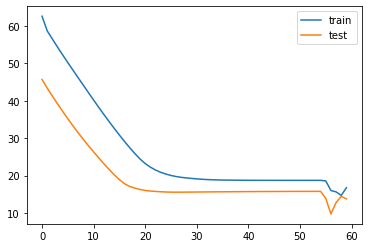

In [ ]:
plt.plot(history_lstm.history['loss'], label='train')
plt.plot(history_lstm.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
test_predict = model_lstm.predict(X_test)
# X_test_reshape = X_test.reshape((X_test.shape[0], X_test.shape[2]))
y_pred = test_predict.flatten()
# inv_test_predict = concatenate((test_predict, X_test_reshape[:, 1:]), axis=1)
# inv_test_predict = scaler.inverse_transform(inv_test_predict)
# inv_test_predict = inv_test_predict[:, 0]

# y_test_reshape = y_test.reshape((len(y_test), 1))
# inv_y_test = concatenate((y_test_reshape, X_test_reshape[:, 1:]), axis=1)
# inv_y_test = scaler.inverse_transform(inv_y_test)
# inv_y_test = inv_y_test[:,0]

import sklearn.metrics as sklm
print(f"Mean Absolute Error {sklm.mean_absolute_error(y_test, y_pred)}")
print(f"Mean Square Error {sklm.mean_squared_error(y_test, y_pred)}")

Mean Absolute Error 13.756973266601562
Mean Square Error 255.2918701171875


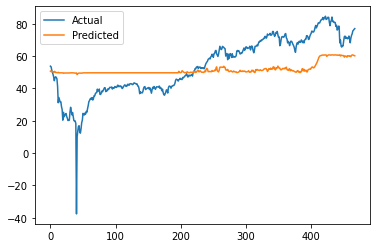

In [ ]:
plt.plot(y_test, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.show()